# Twitter Trend in Canada
From the Analysis performed in the EDA, we detect that tweets increase after March 10th. To track what was going on those days, we download the Twitter Trend in Canada from March 10th to 19th of 2020, at 10:00 and 18:00 hours of each day. In this Jupyter notebook we share the results of this brief analysis.
## Load libraries and open dataset

In [1]:
# General libraries
import pandas as pd
import numpy as np
import time

# To plot
import altair as alt
alt.renderers.enable('mimetype')


RendererRegistry.enable('mimetype')

In [2]:
START = time.time()

# Parameters
my_folder = "../tweets/"

# Open the file
df = pd.read_csv(my_folder + 'twitter_trend.csv')

## Analysis

In [6]:
df.head(6)

,day,hr,rank,twitter_trend,hashtag,count (thousands),tweets
0,10-Mar,10,1,#ThankYouNamjoon,yes,209.7,209.7
1,10-Mar,10,2,#TuesdayThoughts,yes,18.4,18.4
2,10-Mar,10,3,#LateLateNiall,yes,52.4,52.4
3,10-Mar,10,4,#CoreyFeldman,yes,Under 10,10.0
4,10-Mar,10,5,#MYTRUTHDOC,yes,Under 10,10.0
5,10-Mar,10,6,italy,no,710.9,710.9


In [7]:
# Change "Under 10" to 10, in "count (thousands)" variable.
df['tweets'] = [10 if i=="Under 10" else float(i) for i in df['count (thousands)']]
df.head(6)

,day,hr,rank,twitter_trend,hashtag,count (thousands),tweets
0,10-Mar,10,1,#ThankYouNamjoon,yes,209.7,209.7
1,10-Mar,10,2,#TuesdayThoughts,yes,18.4,18.4
2,10-Mar,10,3,#LateLateNiall,yes,52.4,52.4
3,10-Mar,10,4,#CoreyFeldman,yes,Under 10,10.0
4,10-Mar,10,5,#MYTRUTHDOC,yes,Under 10,10.0
5,10-Mar,10,6,italy,no,710.9,710.9


### Twitter trend

In [16]:
# Stats by twitter_trend
df_2 = df.groupby(['twitter_trend', 'hashtag'])['tweets'].agg(['count', 'mean', 'min', 'max']).reset_index()

df_2['total'] = df_2['count'] * df_2['mean']
df_2.sort_values(by=['total', 'count', 'count'], ascending=False, inplace=True)
df_2.reset_index(drop=True, inplace=True)
my_sort = list(df_2.twitter_trend)
df_2.head()

,twitter_trend,hashtag,count,mean,min,max,total
0,COVID-19,no,3,4466.666667,2400.0,5600.0,13400.0
1,China,no,6,1933.333333,1200.0,3400.0,11600.0
2,#COVID19,yes,3,2400.000000,1000.0,3200.0,7200.0
3,italy,no,7,797.628571,524.4,1100.0,5583.4
4,Biden,no,2,2300.000000,1800.0,2800.0,4600.0


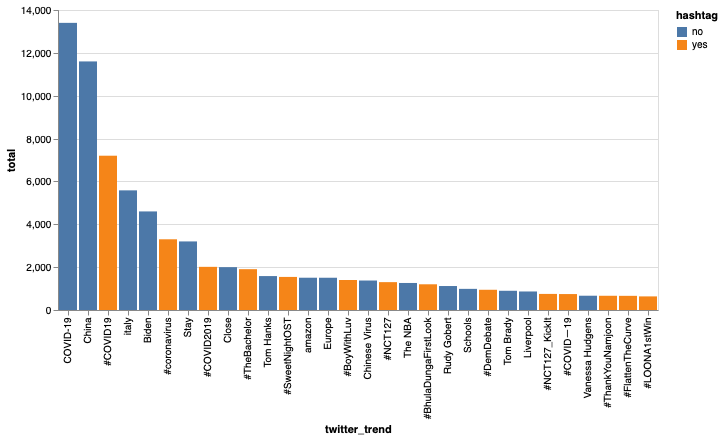

In [22]:
# Plot
alt.Chart(df_2[:30]).mark_bar().encode(
    alt.X('twitter_trend', sort=my_sort),
    alt.Y('total'),
    alt.Color('hashtag'),#, sort=['yes','no'])
    tooltip=['twitter_trend', 'total', 'hashtag']
)

### Only hashtags (#)

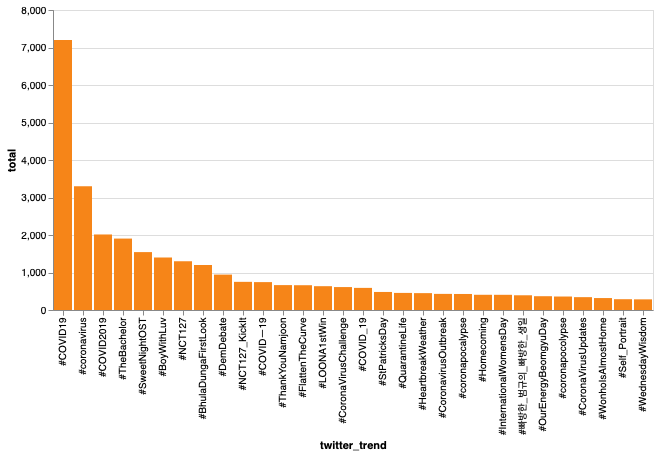

In [21]:
# Plot
alt.Chart(df_2[df_2.hashtag=='yes'][:30]).mark_bar(color='#F68518').encode(
    alt.X('twitter_trend', sort=my_sort),
    alt.Y('total'),
#     alt.Color('hashtag'),#, sort=['yes','no'])
    tooltip=['twitter_trend', 'total', 'hashtag']
)

### Heatmap

In [24]:
df_3 = df.pivot(index=['twitter_trend', 'hashtag'], columns=['day', 'hr'], values='tweets').fillna(0)
df_3['repetitions'] = df_3.astype(bool).sum(axis=1)
df_3['my_mean'] = df_3.mean(axis=1)
df_3.sort_values(by=["repetitions", "my_mean"], ascending=False, inplace=True)
df_3.reset_index(inplace=True)
df_3.head(30)

day          twitter_trend hashtag 10-Mar         11-Mar         12-Mar        \
hr                                     10     18      10     18      10    18   
0         #FlattenTheCurve     yes    0.0    0.0    25.7   33.0    50.2   0.0   
1                    italy      no  710.9  776.8     0.0  524.4   803.6   0.0   
2                    China      no    0.0    0.0     0.0    0.0  1200.0   0.0   
3             #TheBachelor     yes  224.9  251.4   630.3  663.2   134.9   0.0   
4               Hannah Ann      no   58.3   66.0   171.5  180.0    36.7   0.0   
5                     Zoom      no    0.0    0.0     0.0    0.0     0.0   0.0   
6                   Costco      no    0.0    0.0     0.0    0.0     0.0   0.0   
7                  Trudeau      no    0.0    0.0     0.0    0.0     0.0   0.0   
8         #WednesdayWisdom     yes    0.0    0.0     0.0   63.9    78.4   0.0   
9        #MondayMotivation     yes   75.5    0.0     0.0    0.0     0.0   0.0   
10       #SocialDistancing     yes    0.0    0.0     0.0   10.0     0.0  16.0   
11          #selfisolation     yes    0.0    0.0     0.0    0.0     0.0   0.0   
12                COVID-19      no    0.0    0.0     0.0    0.0  2400.0   0.0   
13                #COVID19     yes    0.0    0.0  1000.0    0.0     0.0   0.0   
14              #COVID2019     yes  599.7  567.2     0.0    0.0     0.0   0.0   
15          #SweetNightOST     yes    0.0    0.0     0.0    0.0     0.0   0.0   
16        #ThankYouNamjoon     yes  209.7  321.6   132.7    0.0     0.0   0.0   
17   #CoronaVirusChallenge     yes    0.0    0.0     0.0    0.0     0.0   0.0   
18         #QuarantineLife     yes    0.0    0.0     0.0    0.0     0.0   0.0   
19         Friday the 13th      no    0.0    0.0     0.0    0.0     0.0   0.0   
20      #HeartbreakWeather     yes    0.0    0.0     0.0    0.0     0.0   0.0   
21                    Barb      no   48.2    0.0   257.3    0.0    70.4   0.0   
22        #coronapocolypse     yes    0.0    0.0     0.0    0.0     0.0   0.0   
23                 Walmart      no    0.0    0.0     0.0    0.0     0.0   0.0   
24                FaceTime      no    0.0    0.0     0.0    0.0     0.0   0.0   
25       #DemocraticDebate     yes    0.0    0.0     0.0    0.0     0.0   0.0   
26       #staysafestayhome     yes    0.0    0.0     0.0    0.0     0.0   0.0   
27           #StayTheFHome     yes    0.0    0.0     0.0    0.0     0.0   0.0   
28       #ThursdayThoughts     yes    0.0    0.0     0.0    0.0     0.0  50.4   
29                    Bucs      no    0.0    0.0     0.0    0.0     0.0   0.0   

day  13-Mar         ...  16-Mar       17-Mar         18-Mar         19-Mar  \
hr       10     18  ...      10    18     10     18      10     18      10   
0       0.0    0.0  ...   132.6   0.0  101.1    0.0     0.0    0.0    76.9   
1     909.5    0.0  ...     0.0   0.0    0.0    0.0     0.0    0.0     0.0   
2    1900.0    0.0  ...  1700.0   0.0    0.0    0.0     0.0    0.0     0.0   
3       0.0    0.0  ...     0.0   0.0    0.0    0.0     0.0    0.0     0.0   
4       0.0    0.0  ...     0.0   0.0    0.0    0.0     0.0    0.0     0.0   
5       0.0    0.0  ...     0.0   0.0    0.0    0.0   163.7    0.0   147.5   
6      64.4    0.0  ...     0.0   0.0    0.0    0.0     0.0    0.0     0.0   
7       0.0    0.0  ...    55.3   0.0  146.4    0.0     0.0    0.0     0.0   
8       0.0    0.0  ...     0.0   0.0    0.0    0.0     0.0   62.8    78.8   
9       0.0    0.0  ...    30.1  84.9   89.2    0.0     0.0    0.0     0.0   
10     33.0    0.0  ...     0.0   0.0  166.1    0.0     0.0    0.0     0.0   
11      0.0    0.0  ...    10.0   0.0    0.0    0.0    17.3    0.0    18.5   
12   5600.0    0.0  ...     0.0   0.0    0.0    0.0  5400.0    0.0     0.0   
13      0.0    0.0  ...     0.0   0.0    0.0    0.0  3000.0    0.0  3200.0   
14      0.0    0.0  ...     0.0   0.0    0.0  847.1     0.0    0.0     0.0   
15    233.0  719.2  ...     0.0   0.0    0.0    0.0     0.0    0.0     0.0   
16 

In [35]:
pd.DataFrame(my_sort[:30]).rename(columns={0:"twitter_trend"})

,twitter_trend
0,COVID-19
1,China
2,#COVID19
3,italy
4,Biden
5,#coronavirus
6,Stay
7,#COVID2019
8,Close
9,#TheBachelor


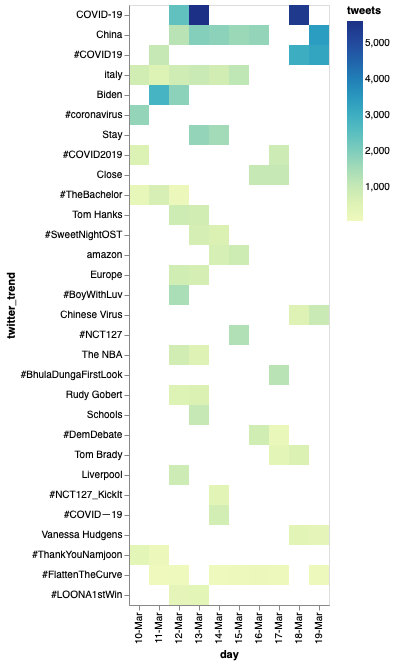

In [49]:
# Heatmap
df_4 = pd.merge(df, pd.DataFrame(my_sort[:30]).rename(columns={0:"twitter_trend"}), how="inner", on=["twitter_trend", "twitter_trend"])
df_4
alt.Chart(df_4).mark_rect().encode(
    alt.Y('twitter_trend:O', sort=my_sort),
    x='day:O',
    color='tweets:Q',
    tooltip=['twitter_trend', 'day', 'tweets']
)